In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler,RobustScaler

def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data 

def load_titanic():
    data = pd.read_csv("titanic.csv")
    return data 

df = load_titanic()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


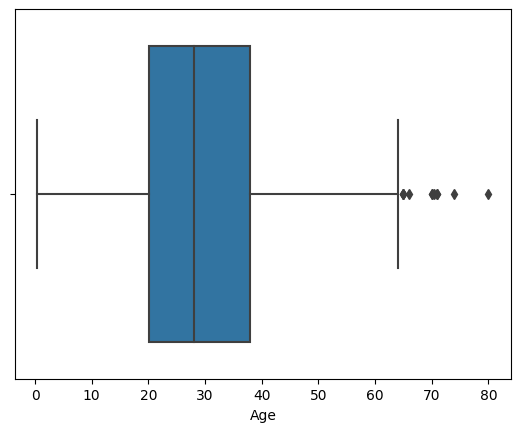

In [2]:
sns.boxplot(x=df["Age"])
plt.show()

In [3]:
def outliers(df,variable):
    q1 = df[variable].quantile(0.25) # 0.05
    q3 = df[variable].quantile(0.75) # 0.95
    iqr = q3-q1
    lower_lim = q1 - 1.5*iqr
    upper_lim = q3 + 1.5*iqr
    return lower_lim, upper_lim
lower_lim, upper_lim = outliers(df,"Age")
df.loc[(df["Age"]<lower_lim) | (df["Age"]>upper_lim)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [4]:
df.loc[(df["Age"]<lower_lim) | (df["Age"]>upper_lim)].any(axis=None)

True

In [5]:
def check_outliers(df, variable, index=False):
    lower_lim, upper_lim = outliers(df, variable)
    
    if index:
        return df.loc[(df[variable] < lower_lim) | (df[variable] > upper_lim)].index.tolist()
    
    else:
        if df.loc[(df[variable] < lower_lim) | (df[variable] > upper_lim)].any(axis=None):
            return True
        else:
            return False

check_outliers(df,"Age",index=True)

[33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]

In [6]:
def grab_cols(df):
    num_cols = [col for col in df.columns if np.issubdtype(df[col],np.number)]
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<10]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >20]
    cat_cols = cat_cols + num_but_cat 
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {len(cat_cols)}")
    print(f"num_cols = {len(num_cols)}")
    print(f"num_but_cat = {len(num_but_cat)}")
    print(f"cat_but_car= {len(cat_but_car)}")
    return cat_cols,num_cols,cat_but_car,num_but_cat

cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = 6
num_cols = 3
num_but_cat = 4
cat_but_car= 3


In [7]:
df[cat_cols]

,Sex,Embarked,Survived,Pclass,SibSp,Parch
0,male,S,0,3,1,0
1,female,C,1,1,1,0
2,female,S,1,3,0,0
3,female,S,1,1,1,0
4,male,S,0,3,0,0
...,...,...,...,...,...,...
886,male,S,0,2,0,0
887,female,S,1,1,0,0
888,female,S,0,3,1,2
889,male,C,1,1,0,0


In [11]:
df["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [14]:
df["Ticket"].apply(lambda x: str(x).split()[0])

0           A/5
1            PC
2      STON/O2.
3        113803
4        373450
         ...   
886      211536
887      112053
888       W./C.
889      111369
890      370376
Name: Ticket, Length: 891, dtype: object

In [13]:
df['Ticket'].apply(lambda x: x[0:3])

0      A/5
1      PC 
2      STO
3      113
4      373
      ... 
886    211
887    112
888    W./
889    111
890    370
Name: Ticket, Length: 891, dtype: object

In [43]:
df["Ticket"].apply(lambda x: x.split()[0:])

0             [A/5, 21171]
1              [PC, 17599]
2      [STON/O2., 3101282]
3                 [113803]
4                 [373450]
              ...         
886               [211536]
887               [112053]
888          [W./C., 6607]
889               [111369]
890               [370376]
Name: Ticket, Length: 891, dtype: object

In [15]:
df[["Ticket"]].apply(lambda x: x.str.split()[0])

,Ticket
0,A/5
1,21171


In [45]:
df["Ticket"].apply(lambda x: x.split()[0])

0           A/5
1            PC
2      STON/O2.
3        113803
4        373450
         ...   
886      211536
887      112053
888       W./C.
889      111369
890      370376
Name: Ticket, Length: 891, dtype: object

In [46]:
df[["Ticket"]].apply(lambda x: x.str.split().str[0])

,Ticket
0,A/5
1,PC
2,STON/O2.
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C.
889,111369


In [17]:
num_cols = ['Age', 'Fare']

In [48]:
for col in num_cols:
    print(col,check_outliers(df,col))

Age True
Fare True


In [49]:
check_outliers(df,"Age",index=True)

[33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]

In [18]:
outlier_dct = {}
for col in num_cols:
    
    print(col,check_outliers(df,col,index=True))
    outlier_dct[col] = check_outliers(df,col,index=True)
    
# outlier_dct

Age [33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]
Fare [1, 27, 31, 34, 52, 61, 62, 72, 88, 102, 118, 120, 124, 139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765, 779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]


In [20]:
# def check(df, variable, index=False):
#     lower_lim, upper_lim = outliers(df, variable)
#     if df.loc[(df[variable] < lower_lim) | (df[variable] > upper_lim)].any(axis=None):
#         print("True")
#     else:
#         print("False")

    
#     if index:
#         return df.loc[(df[variable] < lower_lim) | (df[variable] > upper_lim)].index.tolist()
    

# check(df,"Age",index=False)

True


In [21]:
# for col in num_cols:
    
#     print(col,check(df,col,index=False))

True
Age None
True
Fare None


In [53]:
def grab_outliers(df, variable, index=False):
    lower_lim, upper_lim = outliers(df, variable)
    if df.loc[(df[variable] < lower_lim) | (df[variable] > upper_lim)].shape[0]>10:
        print(df.loc[(df[variable] < lower_lim) | (df[variable] > upper_lim)].head())
    else:
        print(df.loc[(df[variable] < lower_lim) | (df[variable] > upper_lim)])
    if index:
        return df.loc[(df[variable] < lower_lim) | (df[variable] > upper_lim)].index.tolist()
    
grab_outliers(df,"Age",index=True)

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


[33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]

In [54]:
def replace_outliers(df,variable):
    lower_lim, upper_lim = outliers(df,variable)
    df[variable].clip(lower=lower_lim, upper=upper_lim,inplace=True)

replace_outliers(df,"Age")

In [55]:
check_outliers(df,"Age")

False

In [56]:
df2 = sns.load_dataset("diamonds")
df2 = df2.select_dtypes(include="number")
df2 = df2.dropna()
df2.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [57]:
for col in df2.columns:
    print(col,check_outliers(df2,col))

carat True
depth True
table True
price True
x True
y True
z True


In [58]:
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit_predict(df2)

array([-1, -1, -1, ...,  1,  1,  1])

In [66]:
df2_scores = lof.negative_outlier_factor_

In [67]:
df2.shape

(53940, 7)

In [68]:
df2_scores.shape

(53940,)

In [69]:
np.sort(df2_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

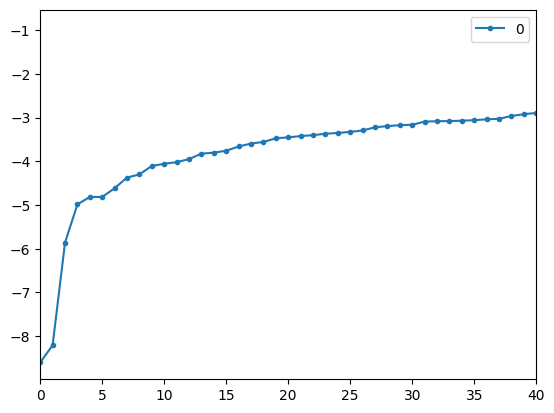

In [70]:
scores = pd.DataFrame(np.sort(df2_scores))
scores.plot(stacked=True,xlim=[0,40],style=".-")
plt.show()

In [71]:
df2_scores[df2_scores<-5]

array([-5.86084355, -8.60430658, -8.20889984])

In [72]:
df2_scores<-5

array([False, False, False, ..., False, False, False])

In [75]:
df2[df2_scores<-5].index

Index([41918, 48410, 49189], dtype='int64')

In [76]:
df2[df2_scores<-5] # 17-3

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [74]:
df2.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [78]:
df2.drop(axis=0,labels=df2[df2_scores<-5].index).shape

(53937, 7)